## Dependencies

In [1]:
import pandas as pd
import io

### Read in CSV:

In [2]:
file_name_sample = 'aadl_holdsplaced_sample.csv'

In [6]:
file_name='holds_placed.csv'

In [7]:
aadl_df=pd.read_csv(file_name,header=None)

In [5]:
aadl_df_sample=pd.read_csv(file_name_sample)

In [37]:
aadl_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1370952,\N,2011-06-28,a,2011-06-29,0,"Bib hold, 40 attached items with 1 of 1 holds",40,1370952,t,\N,30f07070f129d00577f554d5274d65a6
1,1360750,\N,2011-06-28,a,2011-07-01,0,"Bib hold, 45 attached items with 2 of 4 holds",45,1360750,t,\N,30f07070f129d00577f554d5274d65a6
2,1376781,\N,2011-06-28,g,2011-08-15,0,"Bib hold, 2 attached items with 6 of 6 holds",2,1376781,d,\N,a46b89cadb940379dc6be16b438c6172
3,1256631,\N,2011-06-28,g,2011-08-22,0,"Bib hold, 1 attached item with 3 of 3 holds",1,1256631,d,\N,a46b89cadb940379dc6be16b438c6172
4,1385687,\N,2011-06-28,i,2011-09-03,0,"Bib hold, 2 attached items with 10 of 10 holds",2,1385687,d,\N,a46b89cadb940379dc6be16b438c6172


In [8]:
aadl_df=aadl_df.rename({0: 'bib',1:'patron',2:'dateplaced',3:'mat',
                       4:'datefilled',5:'sw',6:'holds',7:'cp',8:'holdnum',
                       9:'pickup',10:'cancelled',11:'patron_hash'},axis=1)

In [39]:
aadl_df.head()

,bib,patron,dateplaced,mat,datefilled,sw,holds,cp,holdnum,pickup,cancelled,patron_hash
0,1370952,\N,2011-06-28,a,2011-06-29,0,"Bib hold, 40 attached items with 1 of 1 holds",40,1370952,t,\N,30f07070f129d00577f554d5274d65a6
1,1360750,\N,2011-06-28,a,2011-07-01,0,"Bib hold, 45 attached items with 2 of 4 holds",45,1360750,t,\N,30f07070f129d00577f554d5274d65a6
2,1376781,\N,2011-06-28,g,2011-08-15,0,"Bib hold, 2 attached items with 6 of 6 holds",2,1376781,d,\N,a46b89cadb940379dc6be16b438c6172
3,1256631,\N,2011-06-28,g,2011-08-22,0,"Bib hold, 1 attached item with 3 of 3 holds",1,1256631,d,\N,a46b89cadb940379dc6be16b438c6172
4,1385687,\N,2011-06-28,i,2011-09-03,0,"Bib hold, 2 attached items with 10 of 10 holds",2,1385687,d,\N,a46b89cadb940379dc6be16b438c6172


In [40]:
len(aadl_df)

7863536

In [41]:
len(aadl_df['bib'].unique())

346914

In our dataframe, there are 346,914 unique materials.

In [42]:
len(aadl_df['patron_hash'].unique())

73817

In our dataframe, there are 73,817 unique patrons.

Idea: group by patron and bib, aggregate the holds data, can see which books/genres a patron group prefers

## Cleaning data

In [9]:
import re

In [10]:
sample_holds = aadl_df['holds'].str\
                               .extract(r', (\S+).+?(\d+).+?(\d+)')\
                               .rename(columns = {0: 'num_attached',
                                                  1: 'waitlist_rank', 
                                                  2: 'holds_on_title'})

In [11]:
sample_holds.head()

,num_attached,waitlist_rank,holds_on_title
0,40,1,1
1,45,2,4
2,2,6,6
3,1,3,3
4,2,10,10


In [12]:
df_cleaned = aadl_df.copy()

In [13]:
def no_to_0 (s):
  if s == 'no':
    return 0
  else:
    return s
sample_holds['num_attached'].apply(no_to_0).astype('int32').head()

0    40
1    45
2     2
3     1
4     2
Name: num_attached, dtype: int32

In [14]:
df_cleaned['holds_by_patron'] = sample_holds['num_attached'].apply(no_to_0)\
                                                            .astype('int32') + 1

In [15]:
df_cleaned['waitlist_rank'] = sample_holds['waitlist_rank']

In [16]:
df_cleaned['holds_on_title'] = sample_holds['holds_on_title']

In [17]:
df_cleaned = df_cleaned.drop(columns = ['patron', 'sw', 'holdnum',
                                        'cp', 'holds','cancelled'])

In [18]:
#df_cleaned['cancelled'] = df_cleaned['cancelled'].str.len() > 0

In [19]:
df_cleaned['count'] = 1

Changing holds_on_title and waitlist_rank to integers

In [20]:
df_cleaned['holds_on_title']=pd.to_numeric(df_cleaned['holds_on_title'])

df_cleaned['waitlist_rank']=pd.to_numeric(df_cleaned['waitlist_rank'])

In [21]:
df_cleaned.dtypes

bib                 int64
dateplaced         object
mat                object
datefilled         object
pickup             object
patron_hash        object
holds_by_patron     int64
waitlist_rank       int64
holds_on_title      int64
count               int64
dtype: object

In [22]:
df_cleaned.head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
0,1370952,2011-06-28,a,2011-06-29,t,30f07070f129d00577f554d5274d65a6,41,1,1,1
1,1360750,2011-06-28,a,2011-07-01,t,30f07070f129d00577f554d5274d65a6,46,2,4,1
2,1376781,2011-06-28,g,2011-08-15,d,a46b89cadb940379dc6be16b438c6172,3,6,6,1
3,1256631,2011-06-28,g,2011-08-22,d,a46b89cadb940379dc6be16b438c6172,2,3,3,1
4,1385687,2011-06-28,i,2011-09-03,d,a46b89cadb940379dc6be16b438c6172,3,10,10,1


### Dropping row if holds_on_title is less than or equal to one
This means the patron was the only person on the waitlist so they were assigned the material right away

In [23]:
more_than_one_hold=df_cleaned[df_cleaned['holds_on_title']>1]

In [24]:
more_than_one_hold.head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
1,1360750,2011-06-28,a,2011-07-01,t,30f07070f129d00577f554d5274d65a6,46,2,4,1
2,1376781,2011-06-28,g,2011-08-15,d,a46b89cadb940379dc6be16b438c6172,3,6,6,1
3,1256631,2011-06-28,g,2011-08-22,d,a46b89cadb940379dc6be16b438c6172,2,3,3,1
4,1385687,2011-06-28,i,2011-09-03,d,a46b89cadb940379dc6be16b438c6172,3,10,10,1
8,1365258,2011-06-28,x,2011-08-08,d,dad9635fe3cacc6a7d13bcb6d33b75f2,4,7,7,1


In [25]:
len(more_than_one_hold)

3588484

In [26]:
df_cleaned.sort_values('dateplaced',ascending=True)

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
28130,1186031,2006-05-09,l,2012-05-18,b,a8627dad0d6c90ffa318f734313fbac4,1,1,2,1
83971,1188249,2010-03-05,j,2010-03-22,-,d3f9eeba6729ead158be326d39704a42,5,1,6,1
31529,1205755,2010-03-05,a,2010-03-11,-,8b1fa47812eed3c911633c0e22e4327b,2,1,1,1
31530,1273931,2010-03-05,g,2010-03-06,-,f819e36607485f91641b1bc5a92cd4f5,4,1,1,1
31531,1312039,2010-03-05,g,2010-03-06,-,39c9a23e9546a893ad8cbef8dacf9baf,10,1,1,1
...,...,...,...,...,...,...,...,...,...,...
7862880,1416997,2017-12-29,g,\N,w,6c919a255d2a761e1a21c30bbf31dbd2,3,1,1,1
7862885,1507221,2017-12-29,g,\N,w,6c919a255d2a761e1a21c30bbf31dbd2,31,2,2,1
7863534,1016392,2017-12-30,a,\N,t,b5290679166b3126c1ab96150633c912,2,1,1,1
7863533,1204760,2017-12-30,g,\N,t,b5290679166b3126c1ab96150633c912,4,1,1,1


Sorting by materials that have the most holds placed on them

In [27]:
df_cleaned.sort_values('holds_on_title',ascending=False).head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
3498078,1424707,2013-03-25,g,2013-06-25,m,381f53c864ed84133b99fa1182ba9e10,1,794,796,1
3498584,1424707,2013-03-25,g,2013-06-25,p,e46625601de4f9cb69cf5a4ed4f900d0,1,792,796,1
3495124,1424707,2013-03-25,g,2013-06-25,d,7b6c8b0162f1342cb55655ca8c2ebc8e,1,786,796,1
3499910,1424707,2013-03-25,g,2013-06-25,m,c2e00d4c8b9125aa8501cbb0cbf0c9a2,1,788,796,1
3499597,1424707,2013-03-25,g,2013-06-26,t,2301e8f906665b4729f7a6d85d4f349e,1,795,796,1


Sorting by date

In [28]:
df_cleaned.sort_values('dateplaced',ascending=True).head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
28130,1186031,2006-05-09,l,2012-05-18,b,a8627dad0d6c90ffa318f734313fbac4,1,1,2,1
83971,1188249,2010-03-05,j,2010-03-22,-,d3f9eeba6729ead158be326d39704a42,5,1,6,1
31529,1205755,2010-03-05,a,2010-03-11,-,8b1fa47812eed3c911633c0e22e4327b,2,1,1,1
31530,1273931,2010-03-05,g,2010-03-06,-,f819e36607485f91641b1bc5a92cd4f5,4,1,1,1
31531,1312039,2010-03-05,g,2010-03-06,-,39c9a23e9546a893ad8cbef8dacf9baf,10,1,1,1


In [29]:
df_cleaned.sort_values('dateplaced',ascending=True).tail()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
7862880,1416997,2017-12-29,g,\N,w,6c919a255d2a761e1a21c30bbf31dbd2,3,1,1,1
7862885,1507221,2017-12-29,g,\N,w,6c919a255d2a761e1a21c30bbf31dbd2,31,2,2,1
7863534,1016392,2017-12-30,a,\N,t,b5290679166b3126c1ab96150633c912,2,1,1,1
7863533,1204760,2017-12-30,g,\N,t,b5290679166b3126c1ab96150633c912,4,1,1,1
7863535,1509419,2017-12-30,a,\N,m,0828af2b6f02980b5ec00f0c526d628d,8,1,1,1


### Data starts 3/5/2010, ends in 12/30/2017

Creating a dataframe for one unique material

In [30]:
df_1473287=df_cleaned[df_cleaned.bib==1473287]

In [31]:
len(df_1473287)

241

In [32]:
df_1473287.sort_values('dateplaced',ascending=True)

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count
5650932,1473287,2015-05-19,a,2015-09-30,p,31fd35b3e1736ff6782c10e8c54c576e,1,7,9,1
5734079,1473287,2015-05-19,a,2015-09-30,d,7c95ea7729a48d4e47055c4d6c388830,1,4,9,1
5718970,1473287,2015-05-19,a,2015-09-30,p,1335e0ad1dbd922d8e9e905f95e171ce,1,8,9,1
5715909,1473287,2015-05-19,a,2015-09-30,p,e3a983a29a37cf40e1d864eeb62de8c6,1,1,9,1
5717220,1473287,2015-05-19,a,2015-09-25,d,fec215ecba077d943e3907a0eb80be98,1,2,9,1
...,...,...,...,...,...,...,...,...,...,...
7696475,1473287,2017-10-02,a,2017-10-03,m,31a481030bbf090b3a4ad670aa1a1484,15,1,1,1
7716126,1473287,2017-10-11,a,2017-10-12,m,09b4809ff6206f1a7b3e595dfd7354cd,15,1,1,1
7786281,1473287,2017-11-14,a,2017-11-15,t,1adaf650f2d9bd302e1a0f3fe767df3a,15,1,1,1
7845269,1473287,2017-12-15,a,2017-12-16,t,ef478f17e90f8c45fa1e2bc9dceac0a9,15,1,1,1


### Look at each patrons number of holds placed based on total products:

In [33]:
list_of_bibs = df_cleaned.groupby(['patron_hash','bib'])\
                         .agg({'count':'sum'})\
                         .reset_index()

In [34]:
list_of_bibs.groupby('patron_hash')\
            .sum()\
            .sort_values('count', ascending = 'True')\
            .drop(columns = 'bib')

,count
patron_hash,
c8b1a508e211b187dbd5a5fc04d68e94,1
5631d2cb3fd960a164eaa3c1b720c81a,1
bda94d80cdba4eff129f2e2e5d02756c,1
bdaf4322ce4724f5f181ec1c6093e81c,1
561e88df14d4b2acfee15432db0375c6,1
...,...
7eeeeaaa2dedb8939a02afe52c19717a,15895
b3d7ac776dfa48abb07798df594920ad,18976
aabc6de324dbc232975ebc5917fb0022,23165


Look at the patrons who received their products (add a time elapsed column):

### Dataframe with only holds that were fulfilled (i.e. had a date placed and a date fulfilled)

In [35]:
#dateframe with only holds that were fulfilled
df_only_holds_fulfilled=df_cleaned.dropna(subset=['datefilled'])

In [36]:
import numpy as np

In [37]:
df_cleaned['datefilled'] = pd.to_datetime(df_cleaned['datefilled'].replace('\\N',np.nan))
df_cleaned['dateplaced'] = pd.to_datetime(df_cleaned['dateplaced'].replace('\\N',np.nan))

In [38]:
df_only_holds_fulfilled['datefilled'] = pd.to_datetime(df_only_holds_fulfilled['datefilled'].replace('\\N',np.nan))
df_only_holds_fulfilled['dateplaced'] = pd.to_datetime(df_only_holds_fulfilled['dateplaced'].replace('\\N',np.nan))

In [39]:
df_only_holds_fulfilled['time_elapsed'] = df_only_holds_fulfilled['datefilled']-df_only_holds_fulfilled['dateplaced']

In [40]:
df_only_holds_fulfilled.head().sort_values('time_elapsed',ascending=False)

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed
4,1385687,2011-06-28,i,2011-09-03,d,a46b89cadb940379dc6be16b438c6172,3,10,10,1,67 days
3,1256631,2011-06-28,g,2011-08-22,d,a46b89cadb940379dc6be16b438c6172,2,3,3,1,55 days
2,1376781,2011-06-28,g,2011-08-15,d,a46b89cadb940379dc6be16b438c6172,3,6,6,1,48 days
1,1360750,2011-06-28,a,2011-07-01,t,30f07070f129d00577f554d5274d65a6,46,2,4,1,3 days
0,1370952,2011-06-28,a,2011-06-29,t,30f07070f129d00577f554d5274d65a6,41,1,1,1,1 days


In [41]:
df_only_holds_fulfilled['month'] = df_only_holds_fulfilled['dateplaced'].dt.month
df_only_holds_fulfilled['year'] = df_only_holds_fulfilled['dateplaced'].dt.year

In [42]:
#dateframe with only holds that were fulfilled
df_only_holds_fulfilled=df_only_holds_fulfilled.dropna(subset=['time_elapsed'])
df_only_holds_fulfilled

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year
0,1370952,2011-06-28,a,2011-06-29,t,30f07070f129d00577f554d5274d65a6,41,1,1,1,1 days,6,2011
1,1360750,2011-06-28,a,2011-07-01,t,30f07070f129d00577f554d5274d65a6,46,2,4,1,3 days,6,2011
2,1376781,2011-06-28,g,2011-08-15,d,a46b89cadb940379dc6be16b438c6172,3,6,6,1,48 days,6,2011
3,1256631,2011-06-28,g,2011-08-22,d,a46b89cadb940379dc6be16b438c6172,2,3,3,1,55 days,6,2011
4,1385687,2011-06-28,i,2011-09-03,d,a46b89cadb940379dc6be16b438c6172,3,10,10,1,67 days,6,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862308,1486537,2017-12-28,g,2017-12-29,d,b4038a4113888009acb764f8d72a2a07,14,2,2,1,1 days,12,2017
7862408,1458193,2017-12-28,i,2017-12-29,m,e97c2736abd03bba706c3513c079ba6c,9,1,1,1,1 days,12,2017
7862525,1174132,2017-12-28,a,2017-12-29,d,cddda251cbbae5ea94061425e4e2ef91,4,2,2,1,1 days,12,2017
7862538,1508895,2017-12-28,g,2017-12-29,m,145920971b8416a97cb3a9021e21334d,15,1,1,1,1 days,12,2017


How long did patrons wait on a monthly basis over time :

In [43]:
# df_only_holds_fulfilled.groupby(['year','month']).sum()
x = df_only_holds_fulfilled.groupby(['year','month'])['time_elapsed'].apply(lambda x: np.mean(x)).reset_index()\
                       .sort_values(['year','month'], ascending = 'True')

In [48]:
x.head()

,year,month,time_elapsed
0,2006,5,2201 days 00:00:00
1,2010,3,27 days 19:38:31.415639
2,2010,4,24 days 02:02:44.461381
3,2010,5,22 days 10:11:31.676458
4,2010,6,20 days 04:21:52.040705


In [49]:
x['yearmon'] = x['year'].astype(str) + x['month'].astype(str)

In [50]:
x

,year,month,time_elapsed,yearmon
0,2006,5,2201 days 00:00:00,20065
1,2010,3,27 days 19:38:31.415639,20103
2,2010,4,24 days 02:02:44.461381,20104
3,2010,5,22 days 10:11:31.676458,20105
4,2010,6,20 days 04:21:52.040705,20106
...,...,...,...,...
90,2017,8,17 days 01:20:57.745078,20178
91,2017,9,18 days 01:16:09.074591,20179
92,2017,10,11 days 23:40:14.086766,201710
93,2017,11,5 days 17:05:06.546035,201711


Yearmon needs to be fixed so we can look at trends: 

In [51]:
x['yearmon'] = x['yearmon'].astype(int)

In [52]:
x['time_elapsed'] = x['time_elapsed'].dt.days.astype(int)

In [53]:
x

,year,month,time_elapsed,yearmon
0,2006,5,2201,20065
1,2010,3,27,20103
2,2010,4,24,20104
3,2010,5,22,20105
4,2010,6,20,20106
...,...,...,...,...
90,2017,8,17,20178
91,2017,9,18,20179
92,2017,10,11,201710
93,2017,11,5,201711


In [54]:
import seaborn as sns
import matplotlib as plt

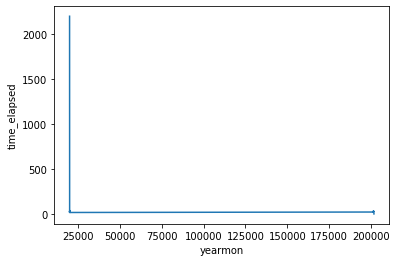

In [55]:
sns.lineplot(x = 'yearmon', y ='time_elapsed', data = x)

In [56]:
#df_1473287['holds_on_title'] = df_1473287['holds_on_title'].astype(int)
#df_1473287['dateplaced'] = pd.to_datetime(df_1473287['dateplaced'])

Plotting hold demand over time for bib 1473287

In [57]:
import seaborn as sns
import matplotlib as plt

In [58]:
df_hunger_games=df_only_holds_fulfilled[df_only_holds_fulfilled['bib']==1319099]

In [59]:
df_hunger_games.head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year
1241,1319099,2011-06-28,a,2011-07-30,p,ae272b5d5ee0844b87f521f4ace6c05b,59,104,105,1,32 days,6,2011
1641,1319099,2011-06-28,a,2011-07-30,t,0cd62db4df7249b678670796267ae4ec,59,105,105,1,32 days,6,2011
2020,1319099,2011-06-28,a,2011-07-29,w,8663a3d01f9755799094c907dc0da735,59,102,105,1,31 days,6,2011
3312,1319099,2011-06-27,a,2011-07-27,m,d8c47a66140164faaa5913f72f4aa9c5,59,104,105,1,30 days,6,2011
3546,1319099,2011-06-27,a,2011-07-29,d,990e5a5ddae119746f8a67ec1e0d0560,59,105,105,1,32 days,6,2011


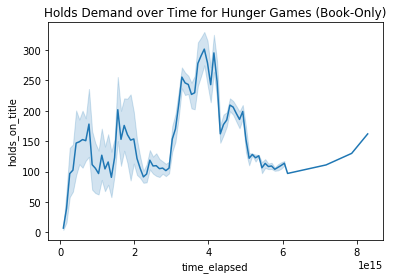

In [60]:
ax = sns.lineplot(x="time_elapsed", y="holds_on_title", data=df_hunger_games);
ax.set_title('Holds Demand over Time for Hunger Games (Book-Only)');

## Introducing the bib data (Analysis & Results to be used for Midterm Progress Report & Presentation)

In [61]:
bib_df=pd.read_csv('isbns.csv')

In [62]:
bib_df=bib_df.rename({'old record id':'old_record_id',
                      'new record id':'new_record_id'},
                      axis=1)

In [63]:
bib_df['old_record_id']=pd.to_numeric(bib_df['old_record_id'])

In [64]:
bib_df.head()
#'old_record_id' corresponds with "bib" in df_cleaned

,old_record_id,new_record_id,title,isbns,catalog link
0,1000002,10255461,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461
1,1000003,10255469,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
2,1000004,10252502,1990 census of population and housing : Summar...,0160346525 :,https://aadl.org/catalog/record/10252502
3,1000005,10000001,1980 census of population.,NaN,https://aadl.org/catalog/record/10000001
4,1000007,10255476,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476


In [65]:
bib_df.dtypes

old_record_id     int64
new_record_id     int64
title            object
isbns            object
catalog link     object
dtype: object

In [66]:
len(bib_df)

376756

In [67]:
len(df_cleaned)

7863536

In [68]:
#unique bibs:
len(df_cleaned['bib'].unique())

346914

In [69]:
bib_df_sorted=bib_df.sort_values('old_record_id')
bib_df_sorted.head(10)

,old_record_id,new_record_id,title,isbns,catalog link
0,1000002,10255461,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461
1,1000003,10255469,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
2,1000004,10252502,1990 census of population and housing : Summar...,0160346525 :,https://aadl.org/catalog/record/10252502
3,1000005,10000001,1980 census of population.,NaN,https://aadl.org/catalog/record/10000001
4,1000007,10255476,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476
5,1000008,10362439,101 dalmatians,0763401021 :,https://aadl.org/catalog/record/10362439
6,1000009,10255482,125 great movie songs,NaN,https://aadl.org/catalog/record/10255482
7,1000011,10289291,16 most requested songs of the 1950s.,NaN,https://aadl.org/catalog/record/10289291
8,1000012,10289297,16 most requested songs of the 1940s.,NaN,https://aadl.org/catalog/record/10289297
9,1000013,10000002,1984 revisited : : totalitarianism in our century,"0060151587 :,0060806605 (pbk.) :",https://aadl.org/catalog/record/10000002


In [70]:
df_only_holds_fulfilled_sorted=df_only_holds_fulfilled.sort_values('bib')


df_only_holds_fulfilled_sorted.head(10)

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year
5578672,1000002,2015-03-22,c,2015-03-23,m,956343647effd9c280fde2aa821ba5be,2,1,1,1,1 days,3,2015
6888673,1000003,2016-09-27,c,2016-09-28,m,06516cc86f159ad0b38401043063b7bd,3,1,1,1,1 days,9,2016
7228079,1000003,2017-02-26,c,2017-02-27,t,c9f08d54a76ddfbc61a92f6591fbbe51,3,1,1,1,1 days,2,2017
2430775,1000003,2012-04-25,c,2012-05-19,p,e25b1fd0545854a2f6ae7a36c03c45e4,3,1,1,1,24 days,4,2012
4285324,1000007,2013-12-14,c,2013-12-19,p,8fb0e3e4b5c92764e7388fd53d85fc37,2,1,1,1,5 days,12,2013
5310613,1000007,2014-12-17,c,2014-12-31,t,bd64038b0855ab8c2a8b7d5c27c7317a,2,1,1,1,14 days,12,2014
4241045,1000007,2013-11-29,c,2013-12-01,t,e1385f50a44fb29f4d37d1bf0b986ede,2,1,1,1,2 days,11,2013
6086475,1000007,2015-10-15,c,2015-10-21,m,c25ebc963704afadf3bf710c15960581,2,1,1,1,6 days,10,2015
4165562,1000009,2013-11-04,c,2013-11-05,p,16bacf4a80802f2436f308412f4c2b58,2,1,1,1,1 days,11,2013
2052923,1000009,2011-12-30,c,2012-01-09,w,ee91d5522b0b58672d661eb330e88b55,2,1,1,1,10 days,12,2011


### How many total holds does each material have over this time period

In [101]:
df_cleaned.groupby('bib')['count']\
          .sum()\
          .sort_values(ascending=False)

bib
1319099    3582
1343156    3236
1407981    2998
1366509    2949
1325639    2848
           ... 
1161455       1
1403447       1
1403451       1
1403452       1
1000002       1
Name: count, Length: 346914, dtype: int64

### Bib 1319099 (The hunger games) has the most total holds placed on it over the time period of the data.

In [102]:
bib_df[bib_df['old_record_id']==1319099]

,old_record_id,new_record_id,title,isbns,catalog link
179623,1319099,10076965,The hunger games,"9780439023481,0439023483,054531058X,0439023521...",https://aadl.org/catalog/record/10076965


## Merging the two data sets

In [71]:
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
merged_dfs=pd.merge(df_only_holds_fulfilled_sorted, 
                    bib_df_sorted, 
                    how='left',
                    left_on='bib',
                    right_on='old_record_id' )

In [72]:
merged_dfs.head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year,old_record_id,new_record_id,title,isbns,catalog link
0,1000002,2015-03-22,c,2015-03-23,m,956343647effd9c280fde2aa821ba5be,2,1,1,1,1 days,3,2015,1000002.0,10255461.0,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461
1,1000003,2016-09-27,c,2016-09-28,m,06516cc86f159ad0b38401043063b7bd,3,1,1,1,1 days,9,2016,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
2,1000003,2017-02-26,c,2017-02-27,t,c9f08d54a76ddfbc61a92f6591fbbe51,3,1,1,1,1 days,2,2017,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
3,1000003,2012-04-25,c,2012-05-19,p,e25b1fd0545854a2f6ae7a36c03c45e4,3,1,1,1,24 days,4,2012,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
4,1000007,2013-12-14,c,2013-12-19,p,8fb0e3e4b5c92764e7388fd53d85fc37,2,1,1,1,5 days,12,2013,1000007.0,10255476.0,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476


In [73]:
len(merged_dfs)

7803387

## Top holds

What is the top held item? Bar Graph

In [106]:
top_holds=merged_dfs.groupby(['title','bib','mat'])['count']\
                    .sum()\
                    .sort_values(ascending=False)\
                    .to_frame()

In [107]:
top_holds.head(20)

,,,count
title,bib,mat,
The hunger games,1319099,a,3581
Catching fire,1343156,a,3235
Gone girl,1407981,a,2998
Mockingjay,1366509,a,2947
The help,1325639,a,2847
All the light we cannot see,1448793,a,2817
The book thief,1266614,a,2359
The fault in our stars,1399206,a,2290
Divergent,1383862,a,2208


In [108]:
top_holds=top_holds.reset_index(level=['title', 'bib','mat'])

[Text(0, 0.5, 'Holds Placed'), Text(0.5, 0, 'Title')]

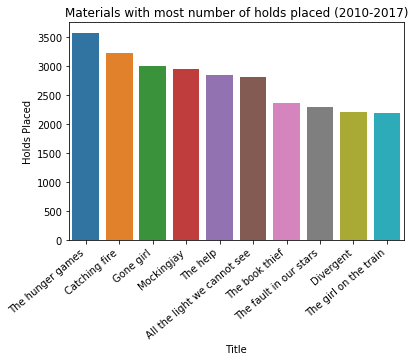

In [109]:
#fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='title',y='count',
               data=top_holds.head(10))
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=40, 
                   ha="right")
ax.set_title('Materials with most number of holds placed (2010-2017)');
ax.set(xlabel='Title',
       ylabel='Holds Placed')

### Compare to different material types, books and music scores: 

Note: we decided to compare both books and music scores because one commonly relates books to libraries and we believe that music scores would be a less-demanded item.

In [110]:
book_materials = merged_dfs[merged_dfs['mat'] == 'a']
c_materials =merged_dfs[merged_dfs['mat'] == 'c']

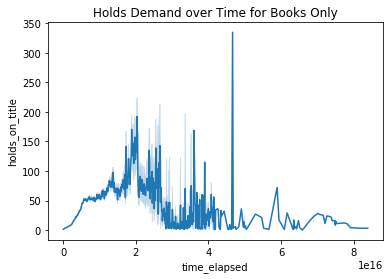

In [111]:
ax = sns.lineplot(x="time_elapsed", y="holds_on_title", data=book_materials);
ax.set_title('Holds Demand over Time for Books Only');

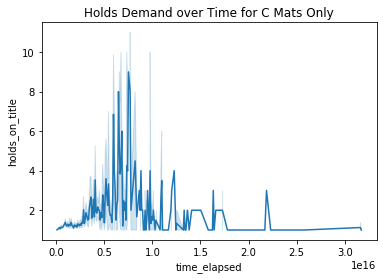

In [112]:
ax = sns.lineplot(x="time_elapsed", y="holds_on_title", data=c_materials);
ax.set_title('Holds Demand over Time for C Mats Only');

How does the spread for each material change based on the number of aggregated holds on such a material:

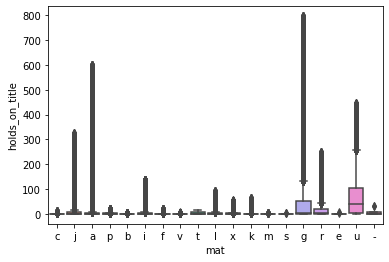

In [113]:
sns.boxplot(x = 'mat', y ='holds_on_title', data = merged_dfs)

Since DVD's, Blu-Ray, and Tools are the most popular...what are their distributions?

In [114]:
dvds = merged_dfs[(merged_dfs['mat']== 'g')]
tools = merged_dfs[(merged_dfs['mat']== 'r')]
bluray = merged_dfs[(merged_dfs['mat']== 'u')]

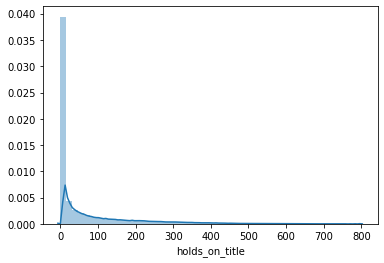

In [115]:
sns.distplot(dvds['holds_on_title']);

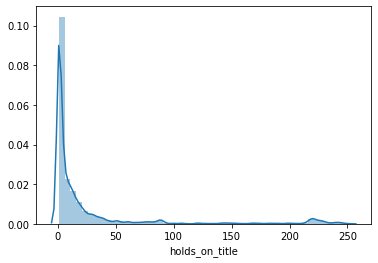

In [116]:
sns.distplot(tools['holds_on_title']);

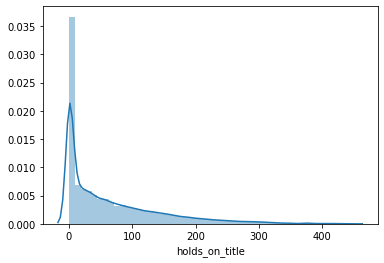

In [117]:
sns.distplot(bluray['holds_on_title']);

In [118]:
merged_granular = merged_dfs[(merged_dfs['mat']!= 'g') &\
                             (merged_dfs['mat']!= 'r') &\
                             (merged_dfs['mat']!= 'u')]

In [119]:
books = merged_dfs[(merged_dfs['mat']== 'a')]

In [120]:
books['holds_on_title'].describe()

count    3.403976e+06
mean     1.111391e+01
std      3.600593e+01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      6.010000e+02
Name: holds_on_title, dtype: float64

In [121]:
iqr = 3-1 
outlier = 3 + (1.5*iqr)

In [122]:
books_outliers = books[books['holds_on_title'] >= outlier]

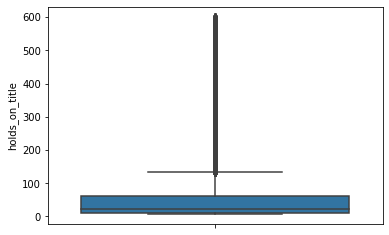

In [123]:
sns.boxplot(y = 'holds_on_title', data = books_outliers)

In [124]:
books_outliers

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year,old_record_id,new_record_id,title,isbns,catalog link
2379,1001864,2011-06-26,a,2011-08-14,p,8514a5d05f43b69808066f9c55ef87e0,11,6,6,1,49 days,6,2011,1001864.0,10004506.0,Go ask Alice,"1416914633,9781416914631,9780671664589",https://aadl.org/catalog/record/10004506
3594,1003075,2011-12-05,a,2012-02-23,w,9ed6dc4610248bc166b8333197927cac,2,6,6,1,80 days,12,2011,NaN,NaN,NaN,NaN,NaN
5932,1004941,2013-03-23,a,2013-04-08,w,7337e2ec8524b5a54c30be6e0819af1b,10,5,10,1,16 days,3,2013,1004941.0,10011602.0,Things fall apart,"0072435186,9780385474542,9780435905255,0385474547",https://aadl.org/catalog/record/10011602
5935,1004941,2016-04-10,a,2016-04-25,t,3c42d727edee91093743ef62b11892d0,10,5,6,1,15 days,4,2016,1004941.0,10011602.0,Things fall apart,"0072435186,9780385474542,9780435905255,0385474547",https://aadl.org/catalog/record/10011602
5941,1004941,2013-04-03,a,2013-05-08,t,365889d2a4bc6864a9cdbfa019e93bca,10,17,17,1,35 days,4,2013,1004941.0,10011602.0,Things fall apart,"0072435186,9780385474542,9780435905255,0385474547",https://aadl.org/catalog/record/10011602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802851,1520041,2017-12-10,a,2017-12-15,m,6d5e8667341b2f64cc74101ff50bd4ba,1,5,6,1,5 days,12,2017,1520041.0,10252221.0,Star Wars.,"9781484780763,1484780760",https://aadl.org/catalog/record/10252221
7802853,1520041,2017-12-11,a,2017-12-15,d,830b2625d5f815a01da0d3182ef3d21b,1,7,8,1,4 days,12,2017,1520041.0,10252221.0,Star Wars.,"9781484780763,1484780760",https://aadl.org/catalog/record/10252221
7802854,1520041,2017-12-10,a,2017-12-15,t,69ce0183a416cd2a948727e97b0392f9,1,6,6,1,5 days,12,2017,1520041.0,10252221.0,Star Wars.,"9781484780763,1484780760",https://aadl.org/catalog/record/10252221
7802857,1520041,2017-12-12,a,2017-12-15,w,78d3d041af9e341241d5ad060ffa4985,1,9,9,1,3 days,12,2017,1520041.0,10252221.0,Star Wars.,"9781484780763,1484780760",https://aadl.org/catalog/record/10252221


## Making a function to determine overall time elapsed since first hold for an individual material

In [125]:
unique_materials_list=merged_dfs['bib'].unique()\
                                       .tolist()
len(unique_materials_list)

346565

In [126]:
#make a df for individual material

material_df=merged_dfs[merged_dfs['bib']==1319099] #unique_materials_list[i]

first_hold=material_df.sort_values('dateplaced',ascending=True).head(1)

first_hold

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year,old_record_id,new_record_id,title,isbns,catalog link
2455755,1319099,2010-03-05,a,2010-03-15,-,aab15ce91b7342ab8ff1854aac1fdf89,29,17,17,1,10 days,3,2010,1319099.0,10076965.0,The hunger games,"9780439023481,0439023483,054531058X,0439023521...",https://aadl.org/catalog/record/10076965


In [127]:
index=first_hold.index.to_list()[0]
index

2455755

In [128]:
material_df.loc[index]['dateplaced']


Timestamp('2010-03-05 00:00:00')

Comment this out so it doesn't have to run again:

In [140]:
first_hold_dates_list=[]
def first_hold(lst):
    for i in lst: #1000002
        material_df=merged_dfs[merged_dfs['bib']==i]
        
        first_hold=material_df.sort_values('dateplaced',
                                           ascending=True)\
                              .head(1)
        
        index=first_hold.index.to_list()[0]
        
        first_hold_date=material_df.loc[index]['dateplaced']
        
        first_hold_dates_list.append(first_hold_date)


        
first_hold(unique_materials_list)

In [131]:
#don't run again, list after first run of function
len(first_hold_dates_list)

226570

In [132]:
346565-len(first_hold_dates_list)

119995

In [112]:
#don't run again, list after first run of function

#first_hold_dates_list

In [133]:
len(first_hold_dates_list)

226570

In [134]:
first_hold_dates_list.pop(119996)

Timestamp('2012-02-15 00:00:00')

In [135]:
len(first_hold_dates_list)

226569

## Dataframe with unique bib number and the first time it appears in the holds dataset

In [141]:
dict1={'bib':unique_materials_list,
       'first_hold_placed':first_hold_dates_list}

hold_first_dates_df=pd.DataFrame(dict1)

In [142]:
hold_first_dates_df

,bib,first_hold_placed
0,1000002,2015-03-22
1,1000003,2012-04-25
2,1000007,2013-11-29
3,1000009,2010-04-19
4,1000010,2011-01-06
...,...,...
346560,1520540,2017-12-15
346561,1520550,2017-12-16
346562,1520568,2017-12-16
346563,1520590,2017-12-20


## Adding first_hold_placed column to merged dataframe

In [143]:
copy_merged_dfs=merged_dfs.copy()

In [144]:
copy_merged_dfs.head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year,old_record_id,new_record_id,title,isbns,catalog link
0,1000002,2015-03-22,c,2015-03-23,m,956343647effd9c280fde2aa821ba5be,2,1,1,1,1 days,3,2015,1000002.0,10255461.0,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461
1,1000003,2016-09-27,c,2016-09-28,m,06516cc86f159ad0b38401043063b7bd,3,1,1,1,1 days,9,2016,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
2,1000003,2017-02-26,c,2017-02-27,t,c9f08d54a76ddfbc61a92f6591fbbe51,3,1,1,1,1 days,2,2017,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
3,1000003,2012-04-25,c,2012-05-19,p,e25b1fd0545854a2f6ae7a36c03c45e4,3,1,1,1,24 days,4,2012,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469
4,1000007,2013-12-14,c,2013-12-19,p,8fb0e3e4b5c92764e7388fd53d85fc37,2,1,1,1,5 days,12,2013,1000007.0,10255476.0,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476


In [145]:
#df.merge(urls_wrong_order,on='name')
df_with_first_hold=copy_merged_dfs.merge(hold_first_dates_df,on='bib')

In [146]:
df_with_first_hold.head()

,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,count,time_elapsed,month,year,old_record_id,new_record_id,title,isbns,catalog link,first_hold_placed
0,1000002,2015-03-22,c,2015-03-23,m,956343647effd9c280fde2aa821ba5be,2,1,1,1,1 days,3,2015,1000002.0,10255461.0,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461,2015-03-22
1,1000003,2016-09-27,c,2016-09-28,m,06516cc86f159ad0b38401043063b7bd,3,1,1,1,1 days,9,2016,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25
2,1000003,2017-02-26,c,2017-02-27,t,c9f08d54a76ddfbc61a92f6591fbbe51,3,1,1,1,1 days,2,2017,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25
3,1000003,2012-04-25,c,2012-05-19,p,e25b1fd0545854a2f6ae7a36c03c45e4,3,1,1,1,24 days,4,2012,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25
4,1000007,2013-12-14,c,2013-12-19,p,8fb0e3e4b5c92764e7388fd53d85fc37,2,1,1,1,5 days,12,2013,1000007.0,10255476.0,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476,2013-11-29


## Save as CSV (DO NOT RE-RUN)

In [2]:
df_with_first_hold.to_csv('first_holds.csv')

NameError: name 'df_with_first_hold' is not defined

Renaming time_elapsed column to be more clear

In [3]:
df_with_first_hold = pd.read_csv('first_holds.csv')

In [4]:
df_with_first_hold=df_with_first_hold.rename({'time_elapsed':'days_waited_for_hold'},
                                             axis=1)

#### New column will be time elapsed since material first appeared in hold data to when that specific hold was placed
#### I.E 'dateplaced' - 'first_hold_placed'

In [44]:
df_only_holds_fulfilled['time_elapsed'] = (df_only_holds_fulfilled['datefilled']-\
                                           df_only_holds_fulfilled['dateplaced'])

In [81]:
df_with_first_hold['dateplaced']= pd.to_datetime(df_with_first_hold['dateplaced'])
df_with_first_hold['first_hold_placed']= pd.to_datetime(df_with_first_hold['first_hold_placed'])

In [82]:
df_with_first_hold['time_since_first_hold'] = (df_with_first_hold['dateplaced']-\
                                               df_with_first_hold['first_hold_placed'])

In [83]:
df_with_first_hold.head()

,Unnamed: 0,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,...,days_waited_for_hold,month,year,old_record_id,new_record_id,title,isbns,catalog link,first_hold_placed,time_since_first_hold
0,0,1000002,2015-03-22,c,2015-03-23,m,956343647effd9c280fde2aa821ba5be,2,1,1,...,1 days 00:00:00.000000000,3,2015,1000002.0,10255461.0,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461,2015-03-22,0 days
1,1,1000003,2016-09-27,c,2016-09-28,m,06516cc86f159ad0b38401043063b7bd,3,1,1,...,1 days 00:00:00.000000000,9,2016,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25,1616 days
2,2,1000003,2017-02-26,c,2017-02-27,t,c9f08d54a76ddfbc61a92f6591fbbe51,3,1,1,...,1 days 00:00:00.000000000,2,2017,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25,1768 days
3,3,1000003,2012-04-25,c,2012-05-19,p,e25b1fd0545854a2f6ae7a36c03c45e4,3,1,1,...,24 days 00:00:00.000000000,4,2012,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25,0 days
4,4,1000007,2013-12-14,c,2013-12-19,p,8fb0e3e4b5c92764e7388fd53d85fc37,2,1,1,...,5 days 00:00:00.000000000,12,2013,1000007.0,10255476.0,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476,2013-11-29,15 days


Now let's try plotting hold demand over time for a single material:

In [84]:
df_hunger_games=df_with_first_hold[df_with_first_hold['bib']==1319099]
df_hunger_games.head(3)

,Unnamed: 0,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,...,days_waited_for_hold,month,year,old_record_id,new_record_id,title,isbns,catalog link,first_hold_placed,time_since_first_hold
2454997,2454997,1319099,2010-04-19,a,2010-05-03,-,54343c6ad05d41c2a07edd5f7b798ad1,29,16,19,...,14 days 00:00:00.000000000,4,2010,1319099.0,10076965.0,The hunger games,"9780439023481,0439023483,054531058X,0439023521...",https://aadl.org/catalog/record/10076965,2010-03-05,45 days
2454998,2454998,1319099,2012-02-27,a,2012-04-06,d,2798b3a63ea9afe719b37ded0bb9cb74,82,254,263,...,39 days 00:00:00.000000000,2,2012,1319099.0,10076965.0,The hunger games,"9780439023481,0439023483,054531058X,0439023521...",https://aadl.org/catalog/record/10076965,2010-03-05,724 days
2454999,2454999,1319099,2012-06-11,a,2012-06-23,m,f82bafeab1de9ed5925229ae42ee343e,167,91,91,...,12 days 00:00:00.000000000,6,2012,1319099.0,10076965.0,The hunger games,"9780439023481,0439023483,054531058X,0439023521...",https://aadl.org/catalog/record/10076965,2010-03-05,829 days


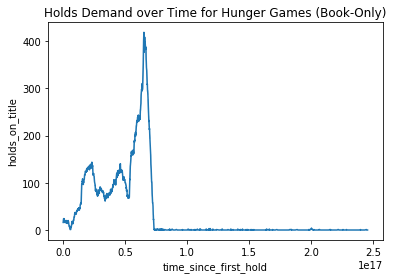

In [85]:
ax = sns.lineplot(x="time_since_first_hold", y="holds_on_title", data=df_hunger_games);
ax.set_title('Holds Demand over Time for Hunger Games (Book-Only)');

Now need to pull out the number in 'time_since_first_hold" column and put it in a diff column so it can be plotted?

In [86]:
#s.dt.days

copy_df=df_hunger_games.copy()


copy_df['days_since_first_hold']=copy_df['time_since_first_hold'].dt.days

copy_df.dtypes

Unnamed: 0                         int64
bib                                int64
dateplaced                datetime64[ns]
mat                               object
datefilled                        object
pickup                            object
patron_hash                       object
holds_by_patron                    int64
waitlist_rank                      int64
holds_on_title                     int64
count                              int64
days_waited_for_hold              object
month                              int64
year                               int64
old_record_id                    float64
new_record_id                    float64
title                             object
isbns                             object
catalog link                      object
first_hold_placed         datetime64[ns]
time_since_first_hold    timedelta64[ns]
days_since_first_hold              int64
dtype: object

In [87]:
df_with_first_hold['days_since_first_hold']=df_with_first_hold['time_since_first_hold'].dt.days

df_with_first_hold.head()

,Unnamed: 0,bib,dateplaced,mat,datefilled,pickup,patron_hash,holds_by_patron,waitlist_rank,holds_on_title,...,month,year,old_record_id,new_record_id,title,isbns,catalog link,first_hold_placed,time_since_first_hold,days_since_first_hold
0,0,1000002,2015-03-22,c,2015-03-23,m,956343647effd9c280fde2aa821ba5be,2,1,1,...,3,2015,1000002.0,10255461.0,The 1980's British invasion,NaN,https://aadl.org/catalog/record/10255461,2015-03-22,0 days,0
1,1,1000003,2016-09-27,c,2016-09-28,m,06516cc86f159ad0b38401043063b7bd,3,1,1,...,9,2016,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25,1616 days,1616
2,2,1000003,2017-02-26,c,2017-02-27,t,c9f08d54a76ddfbc61a92f6591fbbe51,3,1,1,...,2,2017,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25,1768 days,1768
3,3,1000003,2012-04-25,c,2012-05-19,p,e25b1fd0545854a2f6ae7a36c03c45e4,3,1,1,...,4,2012,1000003.0,10255469.0,100 best songs of the 20's and 30's.,0517503689,https://aadl.org/catalog/record/10255469,2012-04-25,0 days,0
4,4,1000007,2013-12-14,c,2013-12-19,p,8fb0e3e4b5c92764e7388fd53d85fc37,2,1,1,...,12,2013,1000007.0,10255476.0,120 Christmas songs : : the world's greatest c...,NaN,https://aadl.org/catalog/record/10255476,2013-11-29,15 days,15


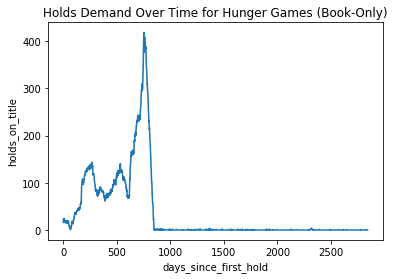

In [88]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=copy_df);
ax.set_title('Holds Demand Over Time for Hunger Games (Book-Only)');

Next want to look into making that x axis by dates, probs month-year

## Compare Material-Peak Demand Times

Look at the unique offerings:

In [89]:
df_with_first_hold['mat'].unique()

array(['c', 'j', 'a', 'p', 'b', 'i', 'f', 'v', 't', 'l', 'x', 'k', 'm',
       's', 'g', 'r', 'e', nan, 'u', '-'], dtype=object)

### Compare Tools to Blu-Ray and DVDs:

In [91]:
tools_updated = df_with_first_hold[df_with_first_hold['mat'] == 'r']
dvds_updated = df_with_first_hold[df_with_first_hold['mat'] == 'g']
bluray_updated = df_with_first_hold[df_with_first_hold['mat'] == 'u']

Aggregate the data based on wait time and the number of holds for that day:

In [92]:
tools_agg = tools_updated.groupby('days_since_first_hold')\
                         .agg({'holds_on_title':'median'})\
                         .reset_index()\
                         .sort_values('days_since_first_hold', ascending = True)

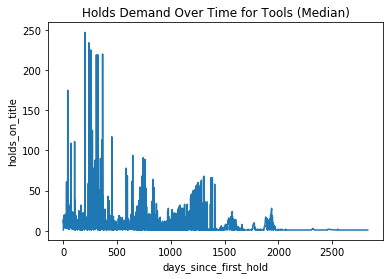

In [93]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=tools_agg);
ax.set_title('Holds Demand Over Time for Tools (Median)');

In [94]:
dvd_agg = dvds_updated.groupby('days_since_first_hold')\
                      .agg({'holds_on_title':'median'})\
                      .reset_index()\
                      .sort_values('days_since_first_hold', ascending = True)

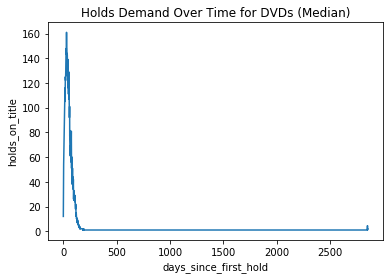

In [95]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=dvd_agg);
ax.set_title('Holds Demand Over Time for DVDs (Median)');

In [96]:
bluray_agg = bluray_updated.groupby('days_since_first_hold')\
                           .agg({'holds_on_title':'median'})\
                           .reset_index()\
                           .sort_values('days_since_first_hold', ascending = True)

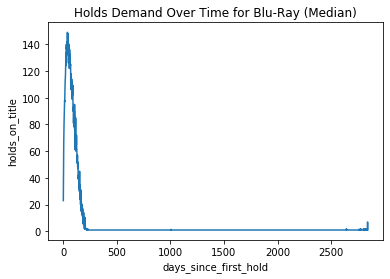

In [97]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=bluray_agg);
ax.set_title('Holds Demand Over Time for Blu-Ray (Median)');

## Question: Is Median the best way to measure peak demand time? 

Note: we utilized median because it is not robust to outliers like the mean

Therefore, analyze sum and mean aggregations as well: 

#### Mean for Tools:

In [98]:
tools_agg_mean = tools_updated.groupby('days_since_first_hold')\
                              .agg({'holds_on_title':'mean'})\
                              .reset_index()\
                              .sort_values('days_since_first_hold', ascending = True)

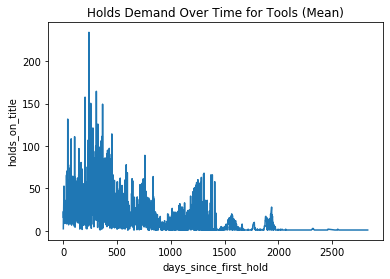

In [99]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=tools_agg_mean);
ax.set_title('Holds Demand Over Time for Tools (Mean)');

#### Mean for DVDs

In [100]:
dvd_agg_mean = dvds_updated.groupby('days_since_first_hold')\
                           .agg({'holds_on_title':'mean'})\
                           .reset_index()\
                           .sort_values('days_since_first_hold', ascending = True)

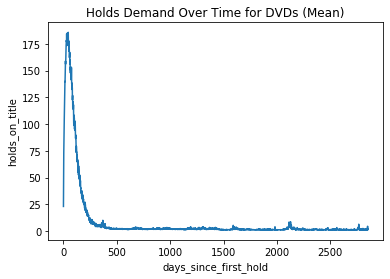

In [101]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=dvd_agg_mean);
ax.set_title('Holds Demand Over Time for DVDs (Mean)');

#### Mean for Blu-Ray

In [102]:
bluray_agg_mean = bluray_updated.groupby('days_since_first_hold')\
                                .agg({'holds_on_title':'mean'})\
                                .reset_index()\
                                .sort_values('days_since_first_hold', ascending = True)

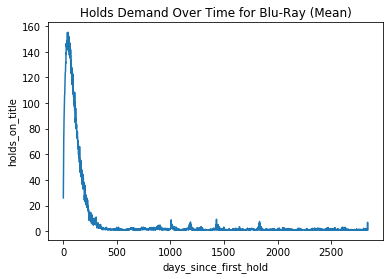

In [103]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=bluray_agg_mean);
ax.set_title('Holds Demand Over Time for Blu-Ray (Mean)');

#### Sum for Tools:

In [104]:
tools_agg_sum = tools_updated.groupby('days_since_first_hold')\
                             .agg({'holds_on_title':'sum'})\
                             .reset_index()\
                             .sort_values('days_since_first_hold', ascending = True)

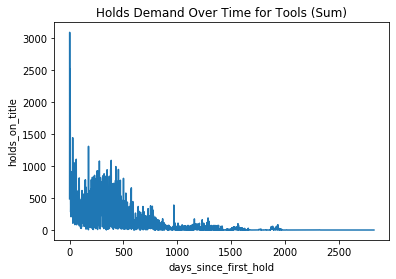

In [105]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=tools_agg_sum);
ax.set_title('Holds Demand Over Time for Tools (Sum)');

#### Sum for DVDs:

In [106]:
dvd_agg_sum = dvds_updated.groupby('days_since_first_hold')\
                          .agg({'holds_on_title':'sum'})\
                          .reset_index()\
                          .sort_values('days_since_first_hold', ascending = True)

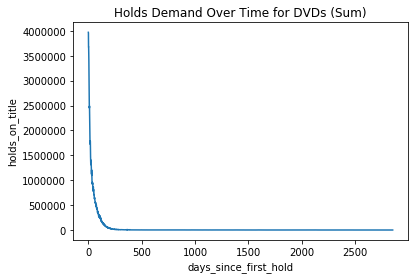

In [107]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=dvd_agg_sum);
ax.set_title('Holds Demand Over Time for DVDs (Sum)');

#### Sum for Blu-Ray:

In [108]:
bluray_agg_sum = bluray_updated.groupby('days_since_first_hold')\
                               .agg({'holds_on_title':'sum'})\
                               .reset_index()\
                               .sort_values('days_since_first_hold', ascending = True)

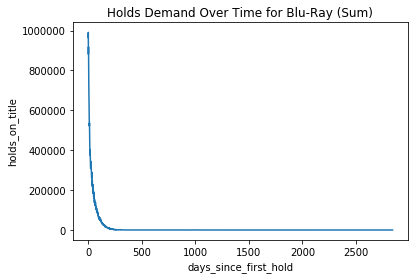

In [109]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=bluray_agg_sum);
ax.set_title('Holds Demand Over Time for Blu-Ray (Sum)');

## Analysis: 

As expected when utilizing sum the most anticipated period for the 3 tested materials was almost immediately after the first hold date; therefore, the sum calculation is irrelevant in trying to estimate such trends. 

## How do books stack up?

In [110]:
books_updated = df_with_first_hold[df_with_first_hold['mat'] == 'a']

In [111]:
dvd_agg = dvds_updated.groupby('days_since_first_hold')\
                      .agg({'holds_on_title':'median'})\
                      .reset_index()\
                      .sort_values('days_since_first_hold', ascending = True)

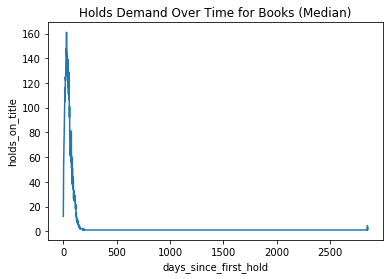

In [114]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=dvd_agg);
ax.set_title('Holds Demand Over Time for Books (Median)');

In [112]:
dvd_agg_mean = dvds_updated.groupby('days_since_first_hold')\
                           .agg({'holds_on_title':'mean'})\
                           .reset_index()\
                           .sort_values('days_since_first_hold', ascending = True)

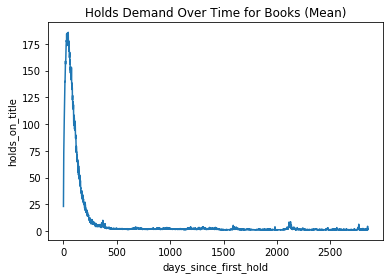

In [115]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=dvd_agg_mean);
ax.set_title('Holds Demand Over Time for Books (Mean)');

In [113]:
dvd_agg_sum = dvds_updated.groupby('days_since_first_hold')\
                          .agg({'holds_on_title':'sum'})\
                          .reset_index()\
                          .sort_values('days_since_first_hold', ascending = True)

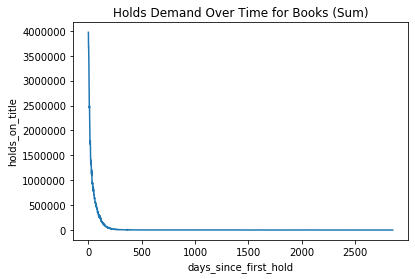

In [116]:
ax = sns.lineplot(x="days_since_first_hold", y="holds_on_title", data=dvd_agg_sum);
ax.set_title('Holds Demand Over Time for Books (Sum)');